# EDA 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/data_clean.csv',index_col=0)
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


# Data type conversion

In [3]:
data.Weather=data.Weather.astype('category')
data.Weather

1       S
2       C
3      PS
4       S
5       S
       ..
154     C
155    PS
156     S
157     S
158     C
Name: Weather, Length: 158, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [4]:
data.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C       object
Month        object
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

In [5]:
data.Weather.dtypes

CategoricalDtype(categories=['C', 'PS', 'S'], ordered=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   158 non-null    object  
 4   Month    158 non-null    object  
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 11.4+ KB


In [7]:
data.Month.value_counts()

9      34
5      31
7      31
8      31
6      30
May     1
Name: Month, dtype: int64

In [8]:
data.Month.replace('May',5,inplace=True)

In [9]:
data['Temp C'].value_counts()

81    11
76    10
82     9
77     8
86     7
78     6
79     6
67     5
73     5
75     5
80     5
92     5
87     5
85     5
84     5
83     4
68     4
57     3
71     3
72     3
69     3
61     3
74     3
90     3
93     3
66     3
88     3
94     2
91     2
89     2
70     2
62     2
64     2
65     2
59     2
58     2
97     1
C      1
96     1
63     1
56     1
Name: Temp C, dtype: int64

In [10]:
data['Temp C'].replace('C',81,inplace=True)

In [11]:
data.Temp

1      67
2      72
3      74
4      62
5      56
       ..
154    67
155    70
156    77
157    75
158    76
Name: Temp, Length: 158, dtype: int64

# Duplicates

In [12]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [13]:
data.duplicated().index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            149, 150, 151, 152, 153, 154, 155, 156, 157, 158],
           dtype='int64', length=158)

In [14]:
data.loc[157]

Ozone       14.0
Solar.R    191.0
Wind        14.3
Temp C        75
Month          9
Day           28
Year        2010
Temp          75
Weather        S
Name: 157, dtype: object

In [15]:
d1=data.drop_duplicates()

In [16]:
d1.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
158    False
Length: 157, dtype: bool

# Drop Column

In [17]:
d1.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

In [18]:
d2=d1.drop(["Temp C"],axis=1)
d2.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [19]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar.R  150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    object  
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 10.1+ KB


# Rename The Column

In [20]:
dit={
    'Solar.R':'Solar'
}
d3=d2.rename(dit,axis=1)
d3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,2010,68,S
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S


In [21]:
d4=d3.drop(['Year'],axis=1)
d4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# Missing Values and Imputation

# Outlier Detection

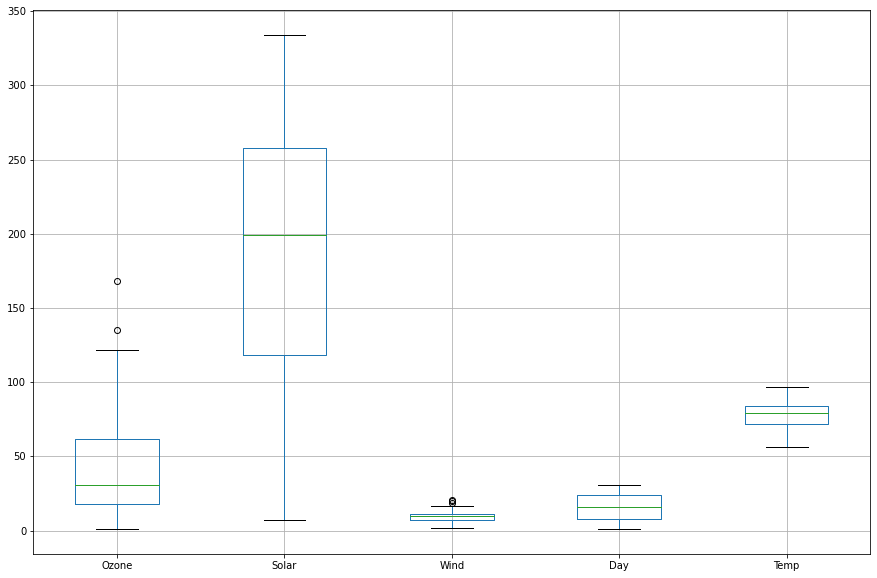

In [22]:
d4.boxplot(figsize=(15,10))
plt.show()


In [23]:
data.Month

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

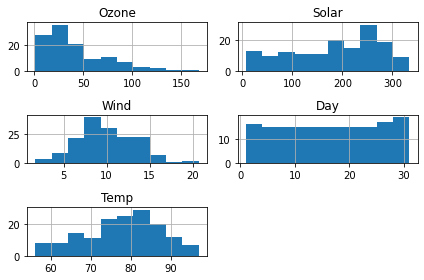

In [24]:
d4.hist()
plt.tight_layout()
plt.show()

In [25]:
d4.describe()
d4.Month

1      5
2      5
3      5
4      5
5      5
      ..
153    9
154    5
155    9
156    9
158    9
Name: Month, Length: 157, dtype: object

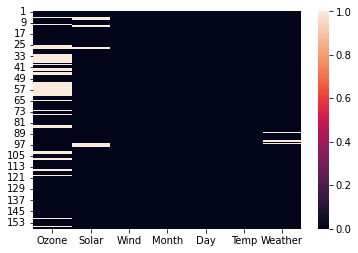

In [26]:
sns.heatmap(d4.isnull())
plt.show()         

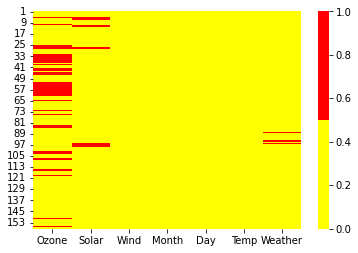

In [27]:
sns.heatmap(d4.isnull(),cmap=['yellow','red'])
plt.show()

In [28]:
d4.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [29]:
(d4.isnull().sum()*100)/len(d4)

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Month       0.000000
Day         0.000000
Temp        0.000000
Weather     1.910828
dtype: float64

In [30]:
d4['Ozone'].fillna(d4['Ozone'].median(),inplace=True)

In [31]:
d4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,31.0,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,31.0,145.0,13.2,9,27,77,S


In [32]:
d4['Solar'].fillna(d4['Solar'].median(),inplace=True)

In [33]:
d4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,31.0,199.0,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,31.0,145.0,13.2,9,27,77,S


In [34]:
d4['Wind'].fillna(d4['Wind'].median(),inplace=True)
d4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,31.0,199.0,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,31.0,145.0,13.2,9,27,77,S


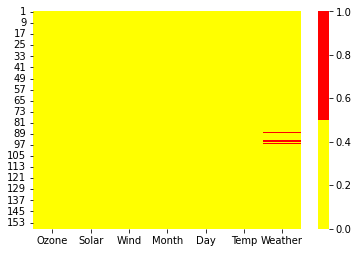

In [35]:
sns.heatmap(d4.isnull(),cmap=['yellow','red'])
plt.show()

In [36]:
mde=d4['Weather'].mode()[0]

In [37]:
mde

'S'

In [38]:
d4['Weather'].fillna(mde,inplace=True)
d4

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,31.0,199.0,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,31.0,145.0,13.2,9,27,77,S


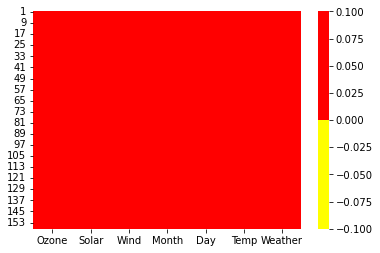

In [39]:
sns.heatmap(d4.isnull(),cmap=['yellow','red'])
plt.show()

# Scatter plot and Correlation analysis

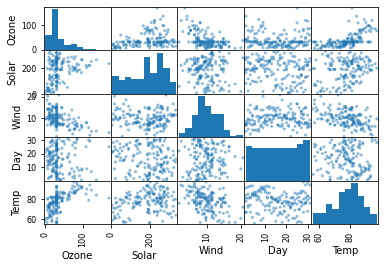

In [40]:
pd.plotting.scatter_matrix(d4)
plt.show()


In [41]:
d4.corr()

,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.297561,-0.523738,-0.031737,0.597087
Solar,0.297561,1.000000,-0.057709,-0.156243,0.256994
Wind,-0.523738,-0.057709,1.000000,0.029900,-0.441228
Day,-0.031737,-0.156243,0.029900,1.000000,-0.122787
Temp,0.597087,0.256994,-0.441228,-0.122787,1.000000


# Transformations

## Dummy Variable

## Normalization of the data

# Speed up the EDA process

In [42]:
!pip install pandas-profiling==2.10.1

In [43]:
from pandas_profiling import ProfileReport

In [44]:
pp=ProfileReport(d4)

In [45]:
pp.to_file(output_file='report2.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]